Import Libraries

In [87]:
import pandas as pd
import sqlalchemy 
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pyodbc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

## using SQLalchemy



In [3]:
# Using sqlalchemy
server = 'DABAS\SQLEXPRESS'
database = 'ChurnDataset'
driver = 'SQL Server'
connection = f"mssql://@{server}/{database}?driver={'SQL Server'}"
engine = create_engine(connection)
connect = engine.connect()


In [4]:
#read data and covert to df
df = pd.read_sql(
      'SELECT * FROM Data',
  engine,
  index_col='customer_id')
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.000000,1,True,True,101348.882812,True
15647311,608,Spain,Female,41,1,83807.859375,1,False,True,112542.578125,False
15619304,502,France,Female,42,8,159660.796875,3,True,False,113931.570312,True
15701354,699,France,Female,39,1,0.000000,2,False,False,93826.632812,False
15737888,850,Spain,Female,43,2,125510.820312,1,True,True,79084.101562,False
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.000000,2,True,False,96270.640625,False
15569892,516,France,Male,35,10,57369.609375,1,True,True,101699.773438,False
15584532,709,France,Female,36,7,0.000000,1,False,True,42085.578125,True


In [5]:
## Query specific results
df_country = pd.read_sql(
      '''select country,count(*) as TOTAL_CUSTOMERS
from data
group by country
ORDER BY TOTAl_CUSTOMERS DESC''',
  engine)
df_country



,country,TOTAL_CUSTOMERS
0,France,5014
1,Germany,2509
2,Spain,2477



## using pyodbc


In [6]:

connection = pyodbc.connect('Trusted_Connection=yes', 
                     driver = '{ODBC Driver 17 for SQL Server}',
                     server = 'DABAS\SQLEXPRESS', 
                     database = 'ChurnDataset')


In [7]:
# get column names and type

query= "SELECT * FROM Data"
cursor = connection.cursor()
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
column_types = [desc[1] for desc in cursor.description]
print(column_names)
print(column_types)



['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
[<class 'int'>, <class 'int'>, <class 'str'>, <class 'str'>, <class 'int'>, <class 'int'>, <class 'float'>, <class 'int'>, <class 'bool'>, <class 'bool'>, <class 'float'>, <class 'bool'>]


In [8]:
#combine these
for each in cursor.description:
    print(each[0:2])

('customer_id', <class 'int'>)
('credit_score', <class 'int'>)
('country', <class 'str'>)
('gender', <class 'str'>)
('age', <class 'int'>)
('tenure', <class 'int'>)
('balance', <class 'float'>)
('products_number', <class 'int'>)
('credit_card', <class 'bool'>)
('active_member', <class 'bool'>)
('estimated_salary', <class 'float'>)
('churn', <class 'bool'>)


In [10]:
#sinmpler and easier way of doing this
df_2 = pd.read_sql( "SELECT * FROM Data",connection)
df_2.dtypes

<ipython-input-10-6f3a47368e2f>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2 = pd.read_sql( "SELECT * FROM Data",connection)


customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card            bool
active_member          bool
estimated_salary    float64
churn                  bool
dtype: object

In [11]:
#no of customers countrywise

df_pydoc = pd.read_sql( '''select country,count(*) as TOTAL_CUSTOMERS
from data
group by country
ORDER BY TOTAl_CUSTOMERS DESC''',connection)
df_pydoc


<ipython-input-11-237cf4df11d4>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pydoc = pd.read_sql( '''select country,count(*) as TOTAL_CUSTOMERS


,country,TOTAL_CUSTOMERS
0,France,5014
1,Germany,2509
2,Spain,2477



Churn Analysis

In [12]:
#customers churned by country
Churn_df = pd.read_sql(
    '''SELECT country, 
    COUNT(CASE WHEN churn=1 THEN 1  END) AS Customers
    FROM Data
    GROUP BY country''',
    engine
)
Churn_df

,country,Customers
0,Germany,814
1,France,810
2,Spain,413


In [13]:
#customers churn rate from based on countrires
Churn_rate_countries_df = pd.read_sql(
'''SELECT 
    country,
    COUNT(*) AS total_customers,
    SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*),2) AS churn_percentage
    FROM Data
    GROUP BY country'''
,engine
)
Churn_rate_countries_df


,country,total_customers,churned_customers,churn_percentage
0,Germany,2509,814,32.44
1,France,5014,810,16.15
2,Spain,2477,413,16.67


In [14]:
#churn rate genderwise

Chrun_rate_genderwise = pd.read_sql(
    '''SELECT 
    gender,
    COUNT(*) AS total_customers,
    SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*),2) AS churn_percentage
    FROM Data
    GROUP BY gender''',
engine);
Chrun_rate_genderwise


,gender,total_customers,churned_customers,churn_percentage
0,Male,5457,898,16.46
1,Female,4543,1139,25.07


In [15]:
Chrun_rate_combined = pd.read_sql(
    '''SELECT 
    country,
    gender,
    COUNT(*) AS total_customers,
    SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*),2) AS churn_percentage
    FROM Data
    GROUP BY country,gender''',
engine);
Chrun_rate_combined

,country,gender,total_customers,churned_customers,churn_percentage
0,Germany,Male,1316,366,27.81
1,Germany,Female,1193,448,37.55
2,Spain,Male,1388,182,13.11
3,Spain,Female,1089,231,21.21
4,France,Male,2753,350,12.71
5,France,Female,2261,460,20.34


In [117]:
#adding criterias
q1 = '''
WITH Criteria AS
(
    SELECT *,
    CASE 
    WHEN age < 18 THEN '18 and below'
    WHEN age BETWEEN 18 AND 30 THEN '18-30'
    WHEN age BETWEEN 31 AND 50 THEN  '31-50'
    WHEN age BETWEEN 51 AND 70 THEN '51-70'
    ELSE '> 70'
    END AS Age_group
    FROM Data
)
SELECT 
    Age_Group,
    COUNT(*) AS total_customers,
    SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*),2) AS churn_percentage
    FROM Criteria
    GROUP BY Age_Group
    ORDER BY churn_percentage DESC
    '''

In [118]:
# churn rate by age group

Churn_age_df = pd.read_sql(q1,engine)
Churn_age_df


,Age_Group,total_customers,churned_customers,churn_percentage
0,51-70,1128,552,48.94
1,31-50,6771,1326,19.58
2,> 70,133,11,8.27
3,18-30,1968,148,7.52


In [55]:
q2 = '''
WITH q2 AS
 (
    SELECT * ,
    CASE 
    WHEN credit_score >= 820 THEN 'Excellent'
    WHEN credit_score >= 760 THEN 'Very Good'
    WHEN credit_score >= 670 THEN 'Good'
    WHEN credit_score >= 580 THEN 'Fair'
    ELSE 'Bad'
    END AS credit_criteria
    FROM Data
)
SELECT 
    Credit_criteria,
    COUNT(*) AS total_customers,
    SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*),2) AS churn_percentage
    FROM q2
    GROUP BY Credit_criteria
    ORDER BY churn_percentage DESC
'''



In [99]:

# churn rate by credit card
Churn_credit_df = pd.read_sql(q2,engine)
Churn_credit_df


,Credit_criteria,total_customers,churned_customers,churn_percentage
0,Bad,2362,520,22.02
1,Fair,3331,685,20.56
2,Excellent,439,88,20.05
3,Very Good,925,183,19.78
4,Good,2943,561,19.06


In [66]:
# Churn rate by product

q3 = '''
SELECT 
products_number,
COUNT(*) AS total_customers,
SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) AS churned_customers,
ROUND(SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*),2) AS churn_percentage
FROM data
GROUP BY  products_number
ORDER BY TOTAl_CUSTOMERS DESC
'''
Churn_product_df = pd.read_sql(q3,engine)
Churn_product_df

,products_number,total_customers,churned_customers,churn_percentage
0,1,5084,1409,27.71
1,2,4590,348,7.58
2,3,266,220,82.71
3,4,60,60,100.00


In [70]:
# churn rate by  product

q4 = '''
SELECT 
tenure,
COUNT(*) AS total_customers,
SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) AS churned_customers,
ROUND(SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*),2) AS churn_percentage
FROM data
GROUP BY tenure
ORDER BY churn_percentage DESC

'''
Churn_product_df = pd.read_sql(q4,engine)
Churn_product_df

,tenure,total_customers,churned_customers,churn_percentage
0,0,413,95,23.00
1,1,1035,232,22.42
2,9,984,213,21.65
3,3,1009,213,21.11
4,5,1012,209,20.65
5,10,490,101,20.61
6,4,989,203,20.53
7,6,967,196,20.27
8,8,1025,197,19.22
9,2,1048,201,19.18


In [73]:
q5= '''
SELECT DISTINCT country,
    (SELECT (SUM(CASE WHEN c2.churn = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) 
     FROM Data c2 WHERE c2.country = c1.country) AS churn_rate,
    (SELECT (SUM(CASE WHEN c3.active_member = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) 
     FROM Data c3 WHERE c3.country = c1.country) AS active_member_percentage
FROM Data c1
'''
Churn_active_df = pd.read_sql(q5,engine)
Churn_active_df

,country,churn_rate,active_member_percentage
0,Germany,32.443204,49.740933
1,France,16.154767,51.675309
2,Spain,16.673395,52.967299


In [74]:
q6 = '''
SELECT 
credit_card,
COUNT(*) AS total_customers,
SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) AS churned_customers,
ROUND(SUM(CASE WHEN churn=1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*),2) AS churn_percentage
FROM data
GROUP BY  credit_card
ORDER BY TOTAl_CUSTOMERS DESC
'''
Churn_credit_df = pd.read_sql(q6,engine)
Churn_credit_df

,credit_card,total_customers,churned_customers,churn_percentage
0,True,7055,1424,20.18
1,False,2945,613,20.81


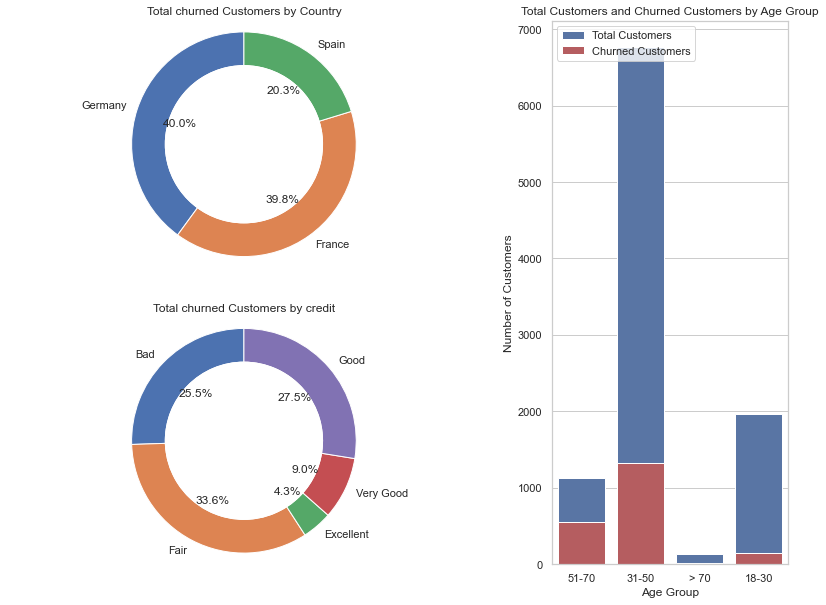

In [144]:
## some visualizations
sns.set(style="whitegrid")

# Create a figure
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1])

# First subplot 
ax1 = fig.add_subplot(gs[0, 0])
countries = Churn_rate_countries_df['country']
total_customers = Churn_rate_countries_df['churned_customers']
ax1.pie(total_customers, labels=countries, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
# Add a white circle at the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  
# Title
plt.title('Total churned Customers by Country')

# second subplot 
ax2 = fig.add_subplot(gs[1, 0])
countries = Churn_credit_df['Credit_criteria']
total_customers1 = Churn_credit_df['churned_customers']
ax2.pie(total_customers1, labels=countries, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
# Add a white circle at the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax2.axis('equal')  
# Title
plt.title('Total churned Customers by credit')


ax3 = fig.add_subplot(gs[:, 1])
sns.barplot(x=Churn_age_df['Age_Group'], y=Churn_age_df['total_customers'], data=Churn_age_df, ax=ax3, color='b', label='Total Customers', errorbar=None)
sns.barplot(x=Churn_age_df['Age_Group'], y=Churn_age_df['churned_customers'], data=Churn_age_df, ax=ax3, color='r', label='Churned Customers', errorbar=None)
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Number of Customers')
ax3.set_title('Total Customers and Churned Customers by Age Group')
ax3.legend(loc='upper left')

